In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
all_ds = pd.read_csv('iris_dataset.csv')
all_ds

# adding header
header_list = ['sepal_length','sepal_width','petal_length','petal_width','target']
all_ds.to_csv('iris_dataset.csv', header=header_list, index=False)
all_ds


,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# print the uniqueo string in the target column
all_ds['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Replace the target column with float values
all_ds['target'] = all_ds['target'].replace(['Iris-setosa'], 0).replace(['Iris-versicolor'], 1).replace(['Iris-virginica'], 2)

In [5]:
all_ds

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [6]:
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target        149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [7]:
all_ds.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [8]:
all_ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [9]:
all_ds = all_ds.dropna()

In [10]:
# Randomly shuffle the rows of the dataset
all_ds = all_ds.sample(frac=1)

* Split the data into 60% train and 40% test

In [11]:
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.4, random_state=42)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(89, 5)
(60, 5)


In [12]:
test_dataset, valid_dataset = train_test_split(all_ds, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(74, 5)
(75, 5)


In [13]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (89, 5)
 Test dataset       : (74, 5)
 Validation dataset : (75, 5)


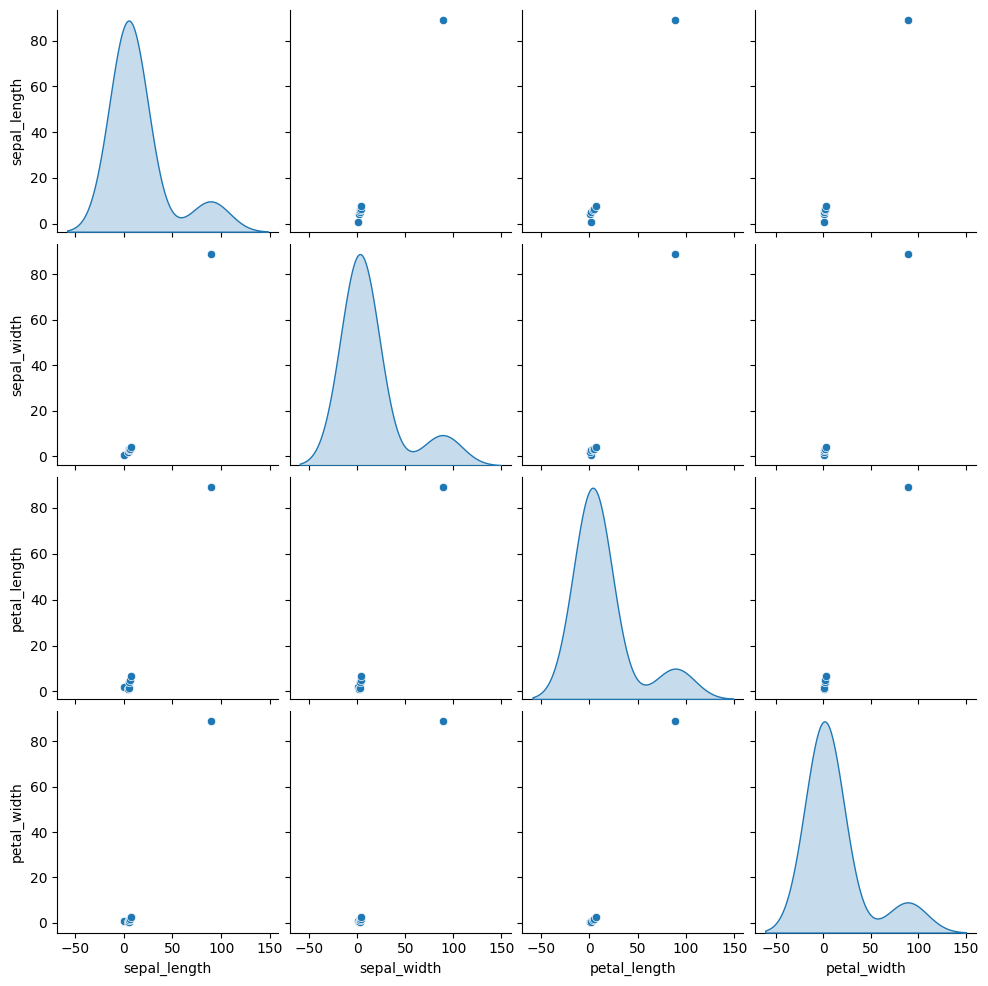

In [14]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("target")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [15]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("target")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,89.0,5.832584,0.859013,4.3,5.1,5.8,6.4,7.9
sepal_width,89.0,3.058427,0.435057,2.0,2.8,3.0,3.3,4.2
petal_length,89.0,3.688764,1.786276,1.1,1.5,4.2,5.1,6.9
petal_width,89.0,1.153933,0.779723,0.1,0.2,1.3,1.8,2.5


In [16]:
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')
valid_labels = valid_dataset.pop('target')

### Data Normalization/Scaling
#### Subtract the mean of the training data and divide by the standard deviation of the training data.

In [17]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [18]:
# show a sample of the data after normalized
normed_train_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
130,2.406734,1.704541,1.517815,1.085088
12,-1.784122,-0.134297,-1.449252,-1.351676
135,0.544131,0.785122,1.069956,1.598091
124,1.591845,0.325412,1.293885,0.828586
44,-1.202059,-0.134297,-1.281305,-1.095175
68,-0.270758,-1.283571,0.118255,-0.069169
16,-0.852821,1.014977,-1.281305,-1.095175
72,0.311306,-0.594007,0.566114,0.059082
29,-1.202059,0.095558,-1.169340,-1.223426
22,-0.852821,0.555267,-1.113358,-0.838673



### Training the model
more details here:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:

#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='linear', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [21]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([0, 2, 0, 2, 0, 0, 2, 1, 2, 0], dtype=int64)

See how the training went

In [22]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9887640449438202


In [23]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.9866666666666667


In [24]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9594594594594594


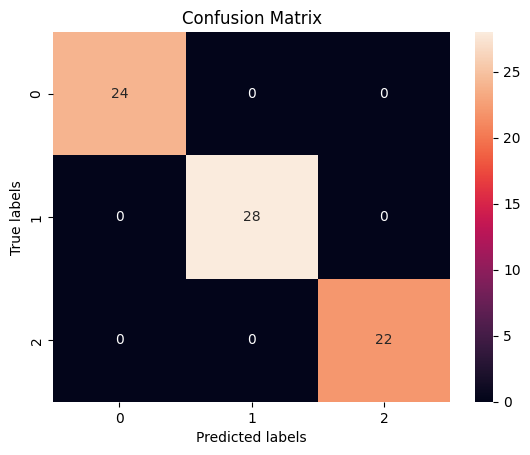

In [25]:

from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);